#### Warm Up | Master's Thesis
# QUANTUM HEISENBERG MODEL


This is just some exercise to diagonalize a small system using `NumPy`.


The quantum Heisenberg model is a quantum mechanical extension of the Ising model used to study magnetic systems. While the Ising model has spins $σ_i ∈ \{± 1\}$ representing magnetic dipoles aligned either up or down, the Heisenberg model allows these spins to behave more realistically using quantum operators.

In the quantum Heisenberg model, spins are represented by Pauli spin-1/2 matrices acting on the tensor product space $\left(\mathbb{C}^2\right)^{\otimes N}$ of dimension $2^N$.



The Pauli matrices, denoted as $\sigma^x$, $\sigma^y$, and $\sigma^z$, are $2 \times 2$ matrices that represent the quantum spin operators in the $x$, $y$, and $z$ directions respectively. These matrices can be thought of as representing rotations of a spin in the Bloch sphere:
$$
\sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma^y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

These matrices are used to define the spin interactions at each site. For a 1D system where only the neighbors are coupled with each other, the Hamiltonian is given by:

$$
\hat{H} = -\frac{1}{2} \sum_{j=1}^N \left( J_x \sigma_j^x \sigma_{j+1}^x + J_y \sigma_j^y \sigma_{j+1}^y + J_z \sigma_j^z \sigma_{j+1}^z + h \sigma_j^z \right)
$$

The Heisenberg model can be categorized based on the coupling constants:

- **XYZ Model**: $J_x \neq J_y \neq J_z$
- **XXZ Model**: $J = J_x = J_y \neq J_z$
- **XXX Model**: $J_x = J_y = J_z = J$

#### 3-SITE HEISENBERG MODEL

As a warm-up exercise, we want to diagonalize a small system of 3 spins.

For this we consider a simplified version of the Heisenberg model with $J_x = J_y = 1$ and $J_z = h = 0$. The Hamiltonian simplifies to:

$$
\hat{H} = -\frac{1}{2} \sum_{j=1}^N \left( \sigma_j^x \sigma_{j+1}^x + \sigma_j^y \sigma_{j+1}^y \right)
$$

This Hamiltonian describes an isotropic coupling in the $x$ and $y$ directions, with no coupling in the $z$ direction or external field.

We are given 3 neighboring spin sites and assume no boundary conditions and only interactions between neighboring spins:

$$
\hat{H}=-\frac{1}{2}\left(\sigma_1^x \sigma_2^x+\sigma_2^x \sigma_3^x+\sigma_1^y \sigma_2^y+\sigma_2^y \sigma_3^y\right)
$$
Each interaction term is represented as a tensor product of Pauli matrices for the spins involved and the identity matrix for the unaffected spin:

$\sigma_1^x \sigma_2^x$ becomes $\sigma^x \otimes \sigma^x \otimes \sigma^0$

$\sigma_2^x \sigma_3^x$ becomes $\sigma^0 \otimes \sigma^x \otimes \sigma^x$

We need to be very careful to respect the order of the tensor product. The order MUST align with the order when creating the state vector.

In [11]:
import numpy as np

from collections import Counter
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from typing import List, Optional

def calculate_average(values: List[float], weights: Optional[List[float]] = None) -> float:
    """
    Calculate the weighted or unweighted average of a list of numbers.

    :param values: A list of numerical values.
    :param weights: A list of weights corresponding to the values. Defaults to None.
    :return: The calculated average.
    :raises ValueError: If the lengths of values and weights differ.
    """
    if weights and len(values) != len(weights):
        raise ValueError("Length of values and weights must be the same.")
    if weights:
        return sum(v * w for v, w in zip(values, weights)) / sum(weights)
    return sum(values) / len(values)


In [13]:
# constructing the Hamiltonian

sigma_0 = np.eye(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

H_x_12 = np.kron(np.kron(sigma_x, sigma_x), sigma_0)
H_x_23 = np.kron(np.kron(sigma_0, sigma_x), sigma_x)
H_y_12 = np.kron(np.kron(sigma_y, sigma_y), sigma_0)
H_y_23 = np.kron(np.kron(sigma_0, sigma_y), sigma_y)

H = -0.5 * (H_x_12 + H_x_23 + H_y_12 + H_y_23)
H

array([[-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -1.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j]])

#### DIAGONALIZATION

```
DISCLAIMER
The following part might not be fully correct. I simply tried to google what is happening for my own understanding.
```

Over time, the system evolves dynamically toward a **Boltzmann distribution** as it interacts with its environment. This distribution describes the probability of occupying an energy eigenstate $E_i$ at thermal equilibrium and is given by:

$$
P\left(E_i\right) \propto e^{-E_i / k_B T}
$$

This distribution is often visualized as a **staircase**, where each step corresponds to an energy level:

- The **ground state** (lowest step) is the most likely to be occupied.
- Higher-energy states (higher steps) are exponentially less likely to be occupied as their energy increases.

If the system starts in a high-energy state or a random superposition of states, it exhibits a **downward trend** in energy due to the relative probabilities of occupation between states. The ratio of probabilities between two states with energies $E_1$ and $E_2$ is given by the **Boltzmann quotient**:

$$
\frac{P\left(E_2\right)}{P\left(E_1\right)}=e^{-\left(E_2-E_1\right) / k_B T}
$$

This quotient explains why:

- **Downward transitions** (from $E_2$ to $E_1$ with $E_2 > E_1$) are more likely.
- **Upward transitions** (from $E_1$ to $E_2$) are less likely, especially for larger energy gaps or lower temperatures.

At very low temperatures ($T \to 0$), the system overwhelmingly occupies the ground state, as $P(E_i) \to 0$ for all $E_i > E_{\text{ground}}$.

Now the Boltzmann Distribution tells us how we get from the raw energy values to the occupation probabilities. But actually we don't know how far each energy level is spread apart, i.e. we actually don't know how the staircase is shaped.

Here is where the Hamiltonian comes into play. The Hamiltonian encodes all the forces, interactions, and constraints in the system and dictates how a system evolves over time (via the Schrödinger equation).
By diagonalizing the Hamiltonian, you uncover the system's possible energies, from the ground state (minimum eigenvalue) to the excited states, i.e. the staircase.

The interesting thing is, when you evolve one of the eigenstates using the Schrödinger equation, you get an infinitesimal change in the global phase of the wave function. This means the frequency of the global phase is dependent on the energy of the eigenstate. This means that different energy levels correspond to different modes of the wave function in the global phase. Each of those states is defined by a configuration of spins and this specific configuration is captured by an eigenvector of the Hamiltonian.

When we apply the **Hamiltonian** $\hat{H}$ to an **eigenvector** $|\psi\rangle$, we obtain:

$$
\hat{H} |\psi\rangle = E |\psi\rangle
$$

where $E$ is the **energy** associated with that eigenvector. This operation is purely **mathematical** and reveals the energy of the state $|\psi\rangle$. Importantly, this is not a **measurement** in the quantum mechanical sense; it doesn’t involve collapsing the wave function but instead simply calculates what the energy would be if we were to measure it.

To relate this to the **ground state**: it is simply the **eigenvector** corresponding to the **lowest energy** (smallest eigenvalue).

In [14]:
# diagonalizing the Hamiltonian

eigenvalues, eigenvectors = np.linalg.eigh(H)
eigenvalues

array([-1.41421356e+00, -1.41421356e+00, -2.75795620e-17, -2.75795620e-17,
       -0.00000000e+00, -0.00000000e+00,  1.41421356e+00,  1.41421356e+00])

In [15]:
# let's say we look at the second eigenvector forth on since it is a bit more exciting than the first one

psi = eigenvectors[1]
psi

array([-0.5       +0.j,  0.        +0.j, -0.70710678-0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j, -0.5       +0.j,  0.        +0.j])

Each entry in the eigenvector corresponds to a specific configuration of spins in the computational basis. For example, the first entry corresponds to the configuration $|000\rangle$, which means all three qubits are in the state $|0\rangle$. The complex conjugate squared of the amplitude at each entry gives the probability of measuring the system in that specific configuration.
Even though we defined the Hamiltonian in terms of the Pauli matrices $\sigma^x$ and $\sigma^y$, the eigenvectors are expressed in the computational basis. The computational basis is essentially the tensor product of the eigenstates of the Pauli matrix $\sigma^z$ (which are $|0\rangle$ and $|1\rangle$) over all spins.

#### QUANTUM STATE TOMOGRAPHY

To perform **Quantum State Tomography (QST)** on the given quantum state, we want to reconstruct the **density matrix** using measurements in the **Pauli basis**. As an initial exercise we simply want to reconstruct the following pure state:

$$
|\psi\rangle =
\begin{bmatrix} 
-\frac{1}{2} \\
0 \\
-\frac{1}{\sqrt{2}} \\
0 \\
0 \\
0 \\
-\frac{1}{2} \\
0
\end{bmatrix}
$$

This state is a vector in an **8-dimensional Hilbert space**, corresponding to a **3-qubit system**. The goal of QST is to determine the state of the system by measuring **expectation values** of specific observables on multiple copies of the system.

Since we know the underlying state, we can simulate the measurement statistics using `NumPy`.

Lets attempt to measure the first qubit in $x$-direction. We begin by constructing the measurement operators corresponding to the projectors onto the $|+\rangle$ and $|-\rangle$ eigenstates of the Pauli $\sigma_x$ operator:

- **Positive eigenstate** with eigenvalue $+1$:
  $$
  |+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
  $$

- **Negative eigenstate** with eigenvalue $-1$:
  $$
  |-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
  $$

The projectors themselves can be expressed in terms of the Pauli $\sigma_x$ operator and the identity operator $\sigma_0$:

$$
P_+ = |+\rangle\langle+|=\frac{1}{2} (\sigma_0 + \sigma_x)
$$

$$
P_- = |-\rangle\langle-|= \frac{1}{2} (\sigma_0 - \sigma_x)
$$

Since the full Hilbert space is 8-dimensional, we need to expand our single-qubit projectors to act on the entire system:

$$
\begin{align*}
& P_{+}^{(0)}=P_{+} \otimes \sigma_0 \otimes \sigma_0 \\
& P_{-}^{(0)}=P_{-} \otimes \sigma_0 \otimes \sigma_0
\end{align*}
$$

The probability of obtaining a specific measurement outcome is given by the expectation value of the corresponding projector with respect to the quantum state $|\psi\rangle$:

- **Probability of measuring $|+\rangle$ on qubit 0**:
  $$
p_{+}^{(0)}=\langle\psi| P_{+}^{(0)}|\psi\rangle
  $$

- **Probability of measuring $|-\rangle$ on qubit 0**:
  $$
p_{-}^{(0)}=\langle\psi| P_{-}^{(0)}|\psi\rangle
  $$

With the probabilities calculated, we can simulate measurements to observe how the quantum state behaves under measurement in the $x$-direction.

In [16]:
# calculating said probabilities on psi

sigma_plus = 0.5 * (sigma_0 + sigma_x)
sigma_minus = 0.5 * (sigma_0 - sigma_x)

meas_plus = np.kron(sigma_plus, np.kron(sigma_0, sigma_0))
meas_minus = np.kron(sigma_minus, np.kron(sigma_0, sigma_0))

prob_plus = np.real(np.vdot(psi, meas_plus @ psi))
prob_minus = np.real(np.vdot(psi, meas_minus @ psi))

print(f"Probability of measuring positive x-direction (|+⟩) on qubit 0: {prob_plus:.3f}")
print(f"Probability of measuring negative x-direction (|−⟩) on qubit 0: {prob_minus:.3f}")
print(f"Sum of probabilities: {prob_plus + prob_minus:.3f}")

Probability of measuring positive x-direction (|+⟩) on qubit 0: 0.854
Probability of measuring negative x-direction (|−⟩) on qubit 0: 0.146
Sum of probabilities: 1.000


In [17]:
# using probabilities to generate counts

samples = 1000
measurements_qubit0 = np.random.choice(['+', '-'], size=samples, p=[prob_plus, prob_minus])

counts_qubit0 = Counter(measurements_qubit0)
print(f"Measurement results for qubit 0 in x basis ({samples} trials): \nstate |+⟩: {counts_qubit0['+']}, state |-⟩: {counts_qubit0['-']}")

Measurement results for qubit 0 in x basis (1000 trials): 
state |+⟩: 890, state |-⟩: 110


#### DENSITY MATRIX RECONSTRUCTION

QST basically involves the reconstruction of the density matrix. In order to fully characterize the quantum state, we need to perform measurements for each direction on each qubit.

For a 3-qubit system, this results in $4^3 = 64$ different combinations of Pauli operators that need to be measured to obtain all necessary expectation values. To obtain the probability distributions we need multiple samples for each of those entries.

The expectation values $\langle \sigma_{i} \otimes \sigma_{j} \otimes \sigma_{k} \rangle $ are computed from the measurement statistics.

The book *Quantum Computation and Quantum Information* by Nielsen and Chuang provides a general formula for reconstructing an $N$-qubit density matrix on page 390 (their Eq. 8.149). In the notation of that book, one writes

$$
\rho
=\sum_{\vec{v}} \frac{\operatorname{tr}\!\bigl(\sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n}\,\rho\bigr)}{2^n}\,
\bigl(\sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n}\bigr),
$$

where $\vec{v} = (v_1, \ldots, v_n)$ with each $v_i \in \{0,1,2,3\}$.

**Specializing to 3 qubits** simply means relabeling $\vec{v}=(v_1, v_2, v_3)$ as $(i,j,k)$. Since each $v_m$ can be $0,1,2,3$, we get
$$
\rho
= \frac{1}{2^3} \sum_{i,j,k=0}^{3}
\operatorname{tr}\!\bigl(\rho\,(\sigma_i \otimes \sigma_j \otimes \sigma_k)\bigr)\,
\bigl(\sigma_i \otimes \sigma_j \otimes \sigma_k\bigr).
$$

Finally, recall that the **trace** of $\rho$ times an operator $M$ is the definition of the **expectation value** of $M$ in the state $\rho$. Symbolically,

$$
\operatorname{tr}\!\bigl(\rho\,M\bigr)
\;=\;
\langle M \rangle,
$$

so we write

$$
\rho
= \frac{1}{2^3} \sum_{i,j,k=0}^{3}
\langle \sigma_{i} \otimes \sigma_{j} \otimes \sigma_{k}\rangle \,
\bigl(\sigma_i \otimes \sigma_j \otimes \sigma_k\bigr).
$$

After this reconstruction, we can compare the density matrix with the one of the state. For the given eigenstate $|\psi\rangle$, we can compute the **density matrix** directly, as it is a pure state. The density matrix $\rho$ for a pure state $|\psi\rangle$ is given by:

$$
\rho = |\psi\rangle \langle \psi|
$$


### STRUCTURED APPROACH TO SAMPLING

From now on we need a bit more structured code to handle the complexity. We would first like to perform sampling again for one specific measurement setting.

In [18]:
class PauliOperator:
    def __init__(self, matrix, eigenvalues, eigenvectors):
        """
        Bundles the relevant information of a Pauli operator into a single object.

        REMARK: The eigenvalues and eigenvectors are directly passed to avoid numerical inaccuracies.

        :param matrix: The matrix representation of the Pauli operator.
        :param eigenvalues: The eigenvalues of the Pauli operator.
        :param eigenvectors: The eigenvectors of the Pauli operator.
        """
        self.matrix = matrix
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors


class MultiQubitMeasurementSetting:
    def __init__(self, measurement_settings):
        """
        Represents a multi-qubit measurement setting using Pauli operators.

        :param measurement_settings: A list of Pauli operators representing the measurement settings for each qubit.
        """
        self._measurement_settings = measurement_settings
        self.eigenvectors = []
        self.eigenvalues = []

        self._construct_basis()

    def _construct_basis(self):
        """
        Constructs the multi-qubit basis vectors and their corresponding eigenvalues from the given Pauli operators.
        """

        # in this first loop we iterate over the computational basis states of the n-qubit system
        # constructing them as a list of 0s and 1s allows us to leverage pythons addressing capabilities
        for state_addressing in product(range(2), repeat=len(self._measurement_settings)):
            multi_qubit_eigenvalue = 1.0
            multi_qubit_eigenvector = None

            # we pair up the Pauli operator for each single qubit basis state and retrieve the matching eigenvalue and eigenvector
            for pauli_op, state_index in zip(self._measurement_settings, state_addressing):
                eigenvalue = pauli_op.eigenvalues[state_index]
                eigenvector = pauli_op.eigenvectors[state_index]

                # the eigenvalue of the multi-qubit operator is the product of the single-qubit eigenvalues
                multi_qubit_eigenvalue *= eigenvalue

                # we build up the multi-qubit eigenvector by taking the tensor product of the single-qubit eigenvectors
                if multi_qubit_eigenvector is None:
                    multi_qubit_eigenvector = eigenvector
                else:
                    multi_qubit_eigenvector = np.kron(multi_qubit_eigenvector, eigenvector)

            self.eigenvalues.append(multi_qubit_eigenvalue)
            self.eigenvectors.append(multi_qubit_eigenvector)

In [19]:
# defining a multi-qubit measurement setting

sigma_0 = PauliOperator(np.array([[1, 0], [0, 1]]), [1, 1], [np.array([1, 0]), np.array([0, 1])])
sigma_x = PauliOperator(np.array([[0, 1], [1, 0]]), [1, -1], [np.array([1, 1]) / np.sqrt(2), np.array([1, -1]) / np.sqrt(2)])
first_qubit_x_meas = MultiQubitMeasurementSetting([sigma_x, sigma_0, sigma_0])

# project the state vector onto the measurement basis and apply Born's rule
first_qubit_x_probs = [np.abs(np.vdot(vec, psi))**2 for vec in first_qubit_x_meas.eigenvectors]
first_qubit_x_probs

[0.12499999999999994,
 0.0,
 0.7285533905932735,
 0.0,
 0.12499999999999994,
 0.0,
 0.021446609406726175,
 0.0]

We get the probabilities to observe the outcomes (0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1) when measuring the first qubit in X-direction.

**Theoretical single-qubit expectation value**:

In order to get the probabilities of measuring only the first qubit alone in either the positive or negative X-direction, we have to marginalize over the outcomes where the qubit has the desired value (0 for |+⟩ and 1 for |−⟩).

In [21]:
first_qubit_plus_prob = sum(first_qubit_x_probs[i] for i, idx in enumerate(product(range(2), repeat=3)) if idx[0] == 0)
first_qubit_minus_prob = sum(first_qubit_x_probs[i] for i, idx in enumerate(product(range(2), repeat=3)) if idx[0] == 1)

print(f"Probability of measuring positive x-direction (|+⟩) on qubit 0: {first_qubit_plus_prob:.3f}")
print(f"Probability of measuring negative x-direction (|−⟩) on qubit 0: {first_qubit_minus_prob:.3f}")
print(f"Sum of probabilities: {first_qubit_plus_prob + first_qubit_minus_prob:.3f}")

Probability of measuring positive x-direction (|+⟩) on qubit 0: 0.854
Probability of measuring negative x-direction (|−⟩) on qubit 0: 0.146
Sum of probabilities: 1.000


#### SAMPLING EXPERIMENT

The probabilities allow us to get a theoretical expectation value by simply multiplying each with the corresponding eigenvalue of the multi-qubit measurement setting.

$$
E_{\text{theo}} = (+1) \cdot p_+ + (-1) \cdot p_- = p_+ - p_- = 0.851 - 0.149 = 0.702
$$

Furthermore, the probabilities allow us to simulate the measurement outcomes by sampling. This allows us to estimate the expectation value of the measurement setting over several measurement runs. Also in this case we need to multiply with the eigenvalues to get a proper expectation value.

The reason for the multiplication with the eigenvalues is that their domain is $[-1, 1]$, so the expectation value is a weighted sum of the eigenvalues. Like a gauge which indicates how much the outcome is skewed towards one of the extremes.

In [23]:
# theoretical expectation value
first_qubit_x_theo_exp = sum(e * p for e, p in zip(first_qubit_x_meas.eigenvalues, first_qubit_x_probs))

# sampling experiment, by choosing random outcome with the given probabilities (outcomes are indexed 0-7)
num_samples = 1000
first_qubit_x_outcomes = np.random.choice(range(8), size=num_samples, p=first_qubit_x_probs)
first_qubit_x_counts = Counter(first_qubit_x_outcomes)

# just like for the theoretical expectation value, we need to multiply the eigenvalues with the probabilities
first_qubit_x_obs_exp = sum(first_qubit_x_meas.eigenvalues[outcome_idx] * (count_value / num_samples) for outcome_idx, count_value in first_qubit_x_counts.items())

print(f"Theoretical expectation value for first qubit in X-direction: {first_qubit_x_theo_exp:.3f}")
print(f"Estimated expectation value for first qubit in X-direction: {first_qubit_x_obs_exp:.3f} (over {num_samples} measurements)")
print(f"Raw outcome counts: {dict(sorted(first_qubit_x_counts.items()))}")

Theoretical expectation value for first qubit in X-direction: 0.707
Estimated expectation value for first qubit in X-direction: 0.684 (over 1000 measurements)
Raw outcome counts: {0: 127, 2: 715, 4: 137, 6: 21}


**Estimated single-qubit expectation value**:

Similar to before we can marginalize over the measured outcomes to get the counts for the first qubit measurement in the X basis.

In [24]:
# the counter uses indices 0-7 instead of the state_addressing tuples ( |000⟩, |001⟩, ... ) like we used before
state_addressings = list(product(range(2), repeat=3))

# we simply iterate over the counter and marginalize depending on the state of the first qubit
first_qubit_x_counts_marginalized = Counter()
for state_idx, count_value in first_qubit_x_counts.items():
    first_qubit_state = state_addressings[state_idx][0]
    first_qubit_x_counts_marginalized[first_qubit_state] += count_value

print(f"Measurement counts of qubit 0 in positive x-direction (|+⟩): {first_qubit_x_counts_marginalized[0]}")
print(f"Measurement counts of qubit 0 in negative x-direction (|−⟩): {first_qubit_x_counts_marginalized[1]}")

Measurement counts of qubit 0 in positive x-direction (|+⟩): 842
Measurement counts of qubit 0 in negative x-direction (|−⟩): 158


### DENSITY MATRIX RECONSTRUCTION

The `MultiQubitMeasurementSetting` allows us to perform a measurement for each combination of single-qubit Pauli operators. All there is left to do is to perform the sampling experiment for each of the $4^3 = 64$ measurement settings.

In [25]:
# define the remaining Pauli operators and put them into a dictionary for easy access
sigma_y = PauliOperator(np.array([[0, -1j], [1j, 0]]), [1, -1], [np.array([1, -1j]) / np.sqrt(2), np.array([1, 1j]) / np.sqrt(2)])
sigma_z = PauliOperator(np.array([[1, 0], [0, -1]]), [1, -1], [np.array([1, 0]), np.array([0, 1])])
pauli_operators = { 'I': sigma_0, 'X': sigma_x, 'Y': sigma_y, 'Z': sigma_z }

# define a function which does everything in one step (calculating probabilities, sampling, estimating the expectation values)
def sample_state(state, pauli_labels, num_samples=1000):
    measurement_settings = [pauli_operators[pl] for pl in pauli_labels]
    multi_qubit_meas_setting = MultiQubitMeasurementSetting(measurement_settings)

    probs = [np.abs(np.vdot(vec, state))**2 for vec in multi_qubit_meas_setting.eigenvectors]

    theo_exp = sum(e * p for e, p in zip(multi_qubit_meas_setting.eigenvalues, probs))

    outcomes = np.random.choice(range(len(state)), size=num_samples, p=probs)
    counts = Counter(outcomes)

    obs_exp = 0
    for state_idx, count_value in counts.items():
        obs_exp += multi_qubit_meas_setting.eigenvalues[state_idx] * (count_value / num_samples)

    return theo_exp, obs_exp

# sanity check with setting from before
sample_state(psi, ['X', 'I', 'I'], num_samples=10000)

(0.7071067811865474, 0.705)

In [26]:
# let's explicitly overwrite psi such that we can play around a bit.
psi = np.array([ -1/2, 0, -1/np.sqrt(2), 0, 0, 0, -1/2, 0 ], dtype=complex)
num_samples = 1000

# creating all combinations of 3-qubit settings from {I, X, Y, Z}
pauli_label_combinations = list(product(['I', 'X', 'Y', 'Z'], repeat=3))

print("Performing measurements for all settings...")
theo_exp_dict = {}
obs_exp_dict = {}

for pauli_labels in pauli_label_combinations:
    theo_exp, obs_exp = sample_state(psi, pauli_labels, num_samples=num_samples)
    theo_exp_dict[pauli_labels] = theo_exp
    obs_exp_dict[pauli_labels] = obs_exp

print("Measurements completed.")

Performing measurements for all settings...
Measurements completed.


In [27]:
# now we have to organize the dictionary above into a density matrix, we do this strictly like in the formula above

rho_reconstructed = np.zeros((8, 8), dtype=complex)
for pauli_labels in obs_exp_dict:
    sigma_i = pauli_operators[pauli_labels[0]].matrix
    sigma_j = pauli_operators[pauli_labels[1]].matrix
    sigma_k = pauli_operators[pauli_labels[2]].matrix

    # building up the expanded multi-qubit basis according to the tensor product just like in the formula
    multi_qubit_bloch_basis = np.kron(sigma_i, np.kron(sigma_j, sigma_k))

    # add the expectation value to the density matrix (exactly where the multi-qubit basis tells us to)
    rho_reconstructed += obs_exp_dict[pauli_labels] * multi_qubit_bloch_basis / 8.0

In [28]:
# since we are dealing with a pure state, the actual density matrix is just the outer product of the state vector
rho_actual = np.outer(psi, psi.conj())

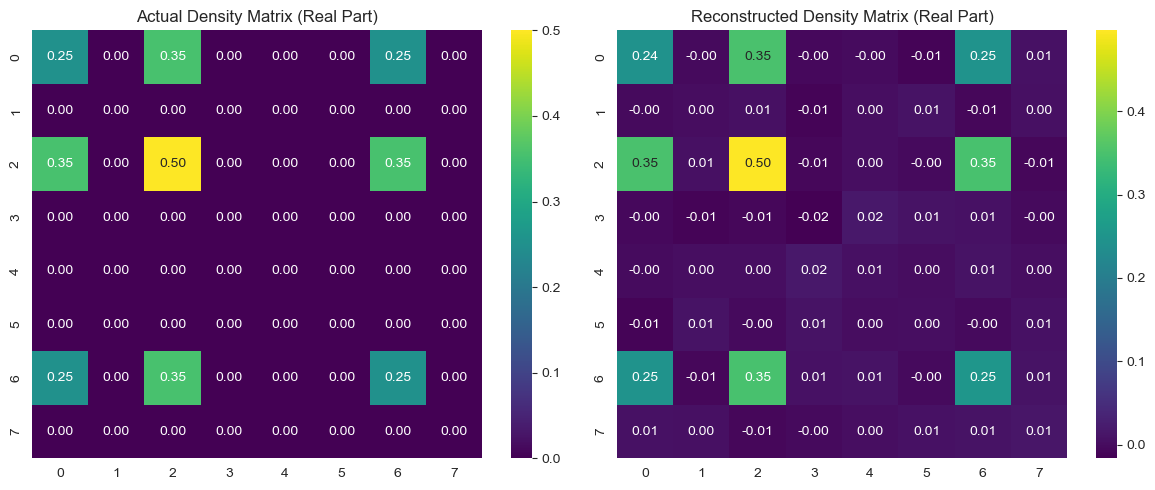

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(np.real(rho_actual), annot=True, fmt=".2f", ax=axes[0], cmap='viridis')
axes[0].set_title('Actual Density Matrix (Real Part)')

sns.heatmap(np.real(rho_reconstructed), annot=True, fmt=".2f", ax=axes[1], cmap='viridis')
axes[1].set_title('Reconstructed Density Matrix (Real Part)')

plt.tight_layout()
plt.show()